In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X,y=make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

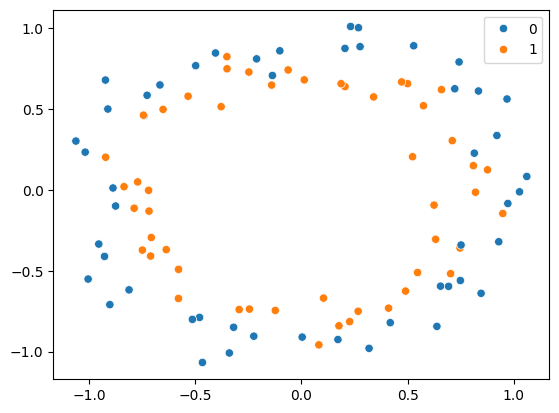

In [3]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,verbose=0)

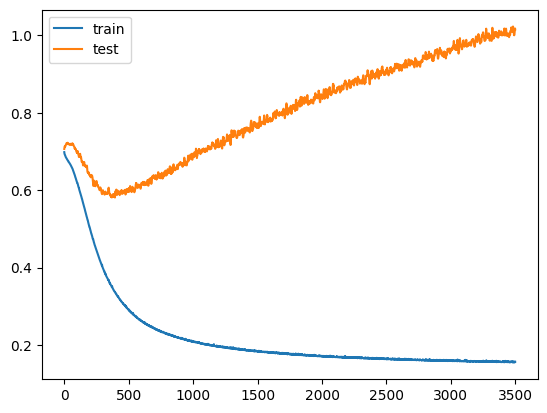

In [11]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 986us/step


<Axes: >

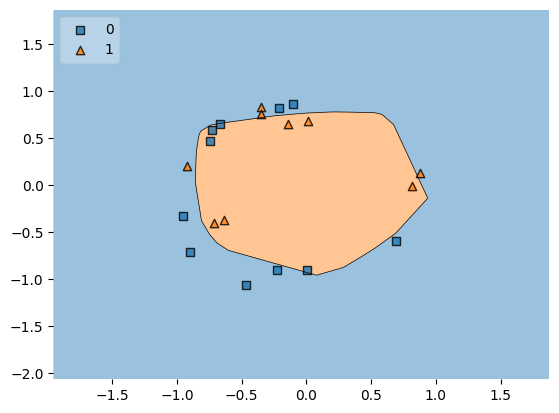

In [13]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)

# Early Stopping

In [58]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=60,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [63]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5430 - loss: 0.6766 - val_accuracy: 0.3500 - val_loss: 0.7292
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5312 - loss: 0.6801 - val_accuracy: 0.3500 - val_loss: 0.7297
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5664 - loss: 0.6700 - val_accuracy: 0.3500 - val_loss: 0.7310
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5781 - loss: 0.6717 - val_accuracy: 0.3500 - val_loss: 0.7311
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5844 - loss: 0.6668 - val_accuracy: 0.3500 - val_loss: 0.7319
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6242 - loss: 0.6620 - val_accuracy: 0.3500 - val_loss: 0.7327
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6164 - loss: 0.6707 - val_accuracy: 0.3500 - val_loss: 0.7331
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6523 - loss: 0.6683 - val_accuracy: 0.3500 - v

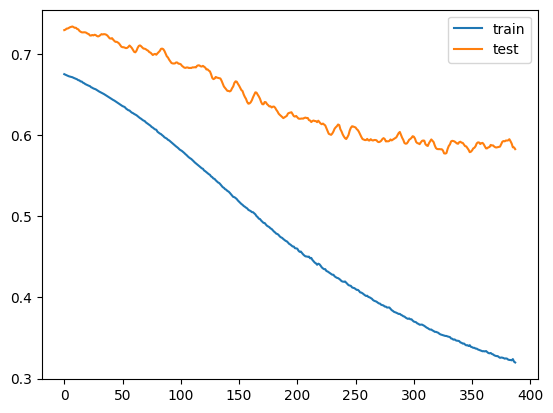

In [65]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 865us/step


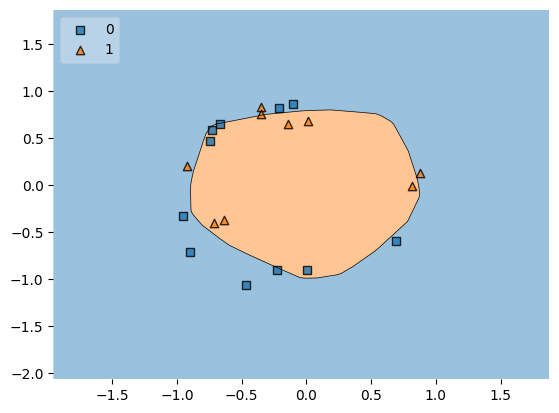

In [66]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()